In [2]:
import tensorflow as tf
from tensorflow import keras

class neural():
        
    def __init__(self, layers, activations, optimizer, loss, metrics):
        if not isinstance(layers, list) or len(layers) == 0:
            raise TypeError("layers error")
        if not isinstance(activations, list) or len(activations) == 0:
            raise TypeError("activations error")
        if not isinstance(optimizer, str) or len(optimizer) == 0:
            raise TypeError("optimizer error")
        if not isinstance(loss, str) or len(loss) == 0:
            raise TypeError("loss error")
        if not isinstance(metrics, list) or len(metrics) == 0:
            raise TypeError("metrics error")

        self.layers = layers
        self.activations = activations
        self.optimizer = optimizer
        self.loss = loss
        self.metrics = metrics
        self.model = None

    def build_model(self, input_dim):
        model = keras.Sequential()
        
        for i in range(len(self.layers)):
            if i == 0:
                model.add(keras.layers.Dense(units=self.layers[i], activation=self.activations[i], input_shape=(input_dim,)))
            else:
                model.add(keras.layers.Dense(units=self.layers[i], activation=self.activations[i]))

        self.model = model

    def compile(self):
        self.model.compile(optimizer=self.optimizer, loss=self.loss, metrics=self.metrics)

    def fit(self, x_train, y_train, batch_size, epochs, val_data):
        history = self.model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=val_data)
        return history

    def evaluate(self, x, y):
        return self.model.evaluate(x, y)

    def predict(self, x):
        return self.model.predict(x)

In [3]:
import os
from dotenv import load_dotenv
import pandas as pd

load_dotenv("../.env")

url = os.getenv("local_paris_ds")

df = pd.read_csv(url)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   squareMeters       10000 non-null  int64  
 1   numberOfRooms      10000 non-null  int64  
 2   hasYard            10000 non-null  int64  
 3   hasPool            10000 non-null  int64  
 4   floors             10000 non-null  int64  
 5   cityCode           10000 non-null  int64  
 6   cityPartRange      10000 non-null  int64  
 7   numPrevOwners      10000 non-null  int64  
 8   made               10000 non-null  int64  
 9   isNewBuilt         10000 non-null  int64  
 10  hasStormProtector  10000 non-null  int64  
 11  basement           10000 non-null  int64  
 12  attic              10000 non-null  int64  
 13  garage             10000 non-null  int64  
 14  hasStorageRoom     10000 non-null  int64  
 15  hasGuestRoom       10000 non-null  int64  
 16  price              1000

In [5]:
df.isna().sum()

squareMeters         0
numberOfRooms        0
hasYard              0
hasPool              0
floors               0
cityCode             0
cityPartRange        0
numPrevOwners        0
made                 0
isNewBuilt           0
hasStormProtector    0
basement             0
attic                0
garage               0
hasStorageRoom       0
hasGuestRoom         0
price                0
dtype: int64

In [6]:
df.head(10)

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0
5,39223,36,0,1,17,39489,8,6,2012,0,1,2009,4552,757,0,1,3926647.2
6,58682,10,1,1,99,6450,10,9,1995,1,1,5930,9453,848,0,5,5876376.5
7,86929,100,1,0,11,98155,3,4,2003,1,0,6326,4748,654,0,10,8696869.3
8,51522,3,0,0,61,9047,8,3,2012,1,1,632,5792,807,1,5,5154055.2
9,39686,42,0,0,15,71019,5,8,2021,1,1,5198,5342,591,1,3,3970892.1


In [7]:
df.describe

<bound method NDFrame.describe of       squareMeters  numberOfRooms  hasYard  hasPool  floors  cityCode  \
0            75523              3        0        1      63      9373   
1            80771             39        1        1      98     39381   
2            55712             58        0        1      19     34457   
3            32316             47        0        0       6     27939   
4            70429             19        1        1      90     38045   
...            ...            ...      ...      ...     ...       ...   
9995          1726             89        0        1       5     73133   
9996         44403             29        1        1      12     34606   
9997         83841              3        0        0      69     80933   
9998         59036             70        0        0      96     55856   
9999          1440             84        0        0      49     18412   

      cityPartRange  numPrevOwners  made  isNewBuilt  hasStormProtector  \
0             

In [8]:
df['price'].min()

np.float64(10313.5)

In [9]:
df['price'].max()

np.float64(10006771.2)

In [10]:
x = df.drop(columns = ['price'])
y = df['price']

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [12]:
import numpy as np
y_log = np.log1p(y)

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_scaled, y_log, test_size=0.2, random_state=42)

In [14]:
input_dim = X_train.shape[1]
nn = neural(layers=[64, 32, 1], activations=["relu", "relu", "linear"], optimizer="adam", loss="mse", metrics=["mae"])

nn.build_model(input_dim)
nn.compile()
history = nn.fit(X_train, y_train, batch_size=32, epochs=150, val_data=(X_test, y_test))

Epoch 1/150


C:\Users\ayzek\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 53.4300 - mae: 5.1863 - val_loss: 2.6903 - val_mae: 1.3180
Epoch 2/150
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.1756 - mae: 1.1764 - val_loss: 1.8811 - val_mae: 1.0973
Epoch 3/150
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.5413 - mae: 0.9825 - val_loss: 1.4020 - val_mae: 0.9234
Epoch 4/150
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.1694 - mae: 0.8529 - val_loss: 1.1097 - val_mae: 0.8191
Epoch 5/150
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9333 - mae: 0.7582 - val_loss: 0.9088 - val_mae: 0.7418
Epoch 6/150
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7727 - mae: 0.6859 - val_loss: 0.7728 - val_mae: 0.6648
Epoch 7/150
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6485 - mae: 0.6225 - val_loss: 0.6514 - val_mae: 0.6163
Epoch 8/150
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5527 - mae: 0.5703 - val_loss: 0.5978 - val_mae: 0.5617
Epoch 9/150
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss

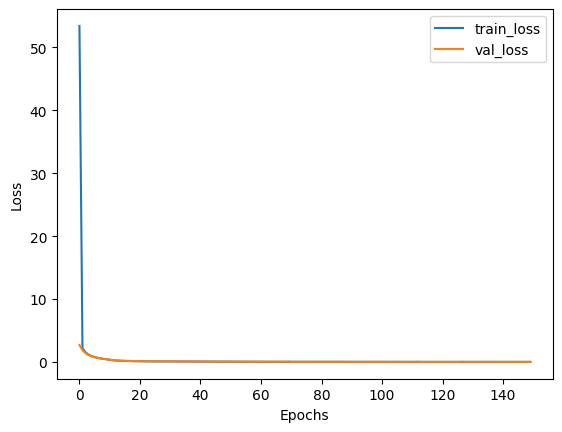

In [17]:
import matplotlib.pyplot as plt

hist = history.history

plt.plot(hist['loss'], label='train_loss')
plt.plot(hist['val_loss'], label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

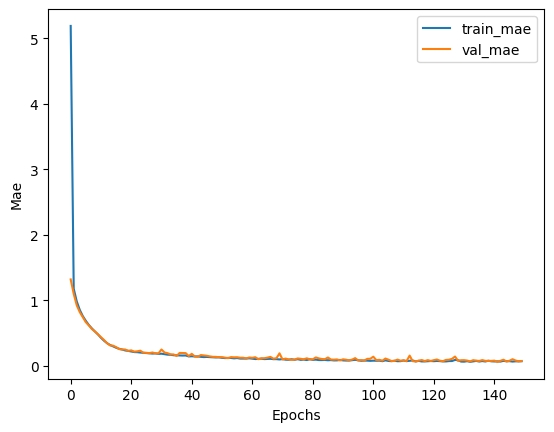

In [18]:
plt.plot(hist['mae'], label='train_mae')
plt.plot(hist['val_mae'], label='val_mae')
plt.xlabel('Epochs')
plt.ylabel('Mae')
plt.legend()
plt.show()